# Initial Statistics

In [103]:
import mysql.connector
import operator

import numpy as np
import pandas as pd

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

#import plotly as py
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns


In [104]:
%matplotlib inline 
po.init_notebook_mode(connected=True)

- **Number of metabolites**

In [105]:
#Ir buscar toda a tabela bioanalysis_metabolite à BD

cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query(''' select * from bioanalysis_metabolite ''', cnx, parse_dates=True)

df = pd.DataFrame(sql_query, columns=['id','common_name', 'id_bioeco','inchi', 'inchi_key', 'smiles'])

print(df)

        id            common_name            id_bioeco  \
0        1             tobramycin  9222799514525203483   
1        2          Telithromycin  9222710493671371933   
2        3        UNII-YCP4CS0W03  9222602442150781005   
3        4     3,5-DIMETHYLPHENOL  9222471406831838542   
4        5     5-Oxooctanoic acid  9222286964594510425   
...    ...                    ...                  ...   
4299  4300         SCHEMBL2580764  7710985295602631400   
4300  4301             Prochloraz  7710932831858002274   
4301  4302      1,2,6-HEXANETRIOL  7710136659027825385   
4302  4303  2-Methylbutanoic acid  7709180902199124149   
4303  4304     (S,S,R,R)-Orlistat  7708370838353571962   

                                                  inchi  \
0     InChI=1S/C18H37N5O9/c19-3-9-8(25)2-7(22)17(29-...   
1     InChI=1S/C43H65N5O10/c1-12-33-43(8)37(48(41(53...   
2     InChI=1S/C6H12N4.H2O4S/c1-4(2)10-6(8)5(7)3-9-1...   
3     InChI=1S/C8H10O/c1-6-3-7(2)5-8(9)4-6/h3-5,9H,1...   
4     In

In [106]:
#Contar nº de ids, praticamente contar o número de linhas
df['id'].count()

4304

Existe *4304* metabolitos na base de dados **Bioanalysis**.

In [107]:
#Limpar duplicados, o bioeconomics tem um erro de duplicados então não podemos contar a coluna id_bioeco
#senão não há duplicados para apagar

df_cleaned = df[~df.duplicated(['common_name','inchi','inchi_key', 'smiles'])]

In [108]:
df_cleaned

,id,common_name,id_bioeco,inchi,inchi_key,smiles
0,1,tobramycin,9222799514525203483,InChI=1S/C18H37N5O9/c19-3-9-8(25)2-7(22)17(29-...,NLVFBUXFDBBNBW-PBSUHMDJSA-N,C1C(C(C(C(C1N)OC2C(C(C(C(O2)CO)O)N)O)O)OC3C(CC...
1,2,Telithromycin,9222710493671371933,InChI=1S/C43H65N5O10/c1-12-33-43(8)37(48(41(53...,LJVAJPDWBABPEJ-UHFFFAOYSA-N,CCC1C2(C(C(C(=O)C(CC(C(C(C(=O)C(C(=O)O1)C)C)OC...
2,3,UNII-YCP4CS0W03,9222602442150781005,InChI=1S/C6H12N4.H2O4S/c1-4(2)10-6(8)5(7)3-9-1...,VKGPVOKDWZAKKE-UHFFFAOYSA-N,CC(C)N1C(=C(C=N1)N)N.OS(=O)(=O)O
3,4,"3,5-DIMETHYLPHENOL",9222471406831838542,"InChI=1S/C8H10O/c1-6-3-7(2)5-8(9)4-6/h3-5,9H,1...",TUAMRELNJMMDMT-UHFFFAOYSA-N,CC1=CC(=CC(=C1)O)C
4,5,5-Oxooctanoic acid,9222286964594510425,InChI=1S/C8H14O3/c1-2-4-7(9)5-3-6-8(10)11/h2-6...,OHGVWVVPDOAZSH-UHFFFAOYSA-N,CCCC(=O)CCCC(=O)O
5,6,AC1LCVJ0,9222148300385709759,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,UDMBCSSLTHHNCD-ASCDQALMSA-N,C1=NC2=C(C(=N1)N)N=CN2C3C(C(C(O3)COP(=O)(O)O)O)O
6,7,3-Chloro-5-fluoroisonicotinic acid,9221885079977129855,InChI=1S/C6H3ClFNO2/c7-3-1-9-2-4(8)5(3)6(10)11...,APKYTXKVPCYUOG-UHFFFAOYSA-N,C1=C(C(=C(C=N1)Cl)C(=O)O)F
7,8,None,9221877112145259159,InChI=1S/C61H86N13O13P.CN.Co/c1-29-21-38-39(22...,WNHNILJCIPJCDB-UHFFFAOYSA-N,CC1=CC2=C(C=C1C)N(C=N2)C3C(C(C(O3)CO)O[P+](=O)...
8,9,2-(Hexyloxy)ethanol,9221440159283858055,"InChI=1S/C8H18O2/c1-2-3-4-5-7-10-8-6-9/h9H,2-8...",UPGSWASWQBLSKZ-UHFFFAOYSA-N,CCCCCCOCCO
9,10,Methyl jasmonate,9221308421455500483,InChI=1S/C13H20O3/c1-3-4-5-6-11-10(7-8-12(11)1...,GEWDNTWNSAZUDX-PLNGDYQASA-N,CCC=CCC1C(CCC1=O)CC(=O)OC


In [109]:
#Contar nº de ids únicos, é como contar o nº de linhas outra vez
df_cleaned['id'].nunique()

4292

Existe *4292* metabolitos na base de dados **Bioanalysis**, sem o erro de duplicação do **Bioeconomis**.

In [110]:
cnx.close()

Usando agora outra query vamos contar o número de metabolitos para apenas um determinado período de tempo **(01/18 a 06/19)**. Esta query será representativa do número total de preços existentes no **bioanalysis** e que estão apenas nas unidades das **g e derivados**.

NOTA: Será que vale a pena apenas selecionar os preços distintos e retirar os duplicados??

In [111]:
# Dataframe com query a selecionar todos os preços com unidades de g ou derivados, e no período de tempo entre 01/18 e 06/19

cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query(''' select bioanalysis_metabolite_price.metabolite_id       as metab_id,  
                                  bioanalysis_metabolite.common_name                      as metab_name,
                                  bioanalysis_metabolite_price.date, 
                                  bioanalysis_metabolite_price.price                      as price, 
                                  bioanalysis_metabolite_price.amount                     as amount, 
                                  bioanalysis_metabolite_price.unity                      as unity, 
                                  if(provider.name is null, "None", provider.name)        as provider_name, 
                                  bioanalysis_metabolite_price.source                     as source,
                                  price/amount                                            as price_per_unity,
                                  price/amount*convert_to_g(unity)                        as price_per_g,
                                  year(date)                                              as year, 
                                  month(date)                                             as month
                                  from bioanalysis_metabolite_price
                                  JOIN provider 
                                      on provider.id = bioanalysis_metabolite_price.provider_id
                                  JOIN bioanalysis_metabolite
                                      on bioanalysis_metabolite_price.metabolite_id = bioanalysis_metabolite.id
                                  where convert_to_g(unity) is not null and ((year(date)*10000) + (month(date)*100) between 20180100 and 20190600)
                              ''', cnx, index_col = 'date', parse_dates=True)  

df = pd.DataFrame(sql_query, columns=['metab_id','metab_name', 'price','amount', 'unity', 'provider_name', 'source', 'price_per_unity', 'price_per_g', 'year', 'month'])

print(df)

                     metab_id                    metab_name  price  amount  \
date                                                                         
2018-01-11 21:39:13         1                    tobramycin  158.0     1.0   
2018-02-11 23:46:53         1                    tobramycin  158.0     1.0   
2018-03-11 23:47:07         1                    tobramycin  158.0     1.0   
2018-04-11 22:47:14         1                    tobramycin  158.0     1.0   
2018-05-11 22:47:27         1                    tobramycin  158.0     1.0   
...                       ...                           ...    ...     ...   
2019-05-06 11:26:13      4128  2-Methyl-5-nitro-2H-indazole  760.0    10.0   
2019-06-14 07:36:43      4128  2-Methyl-5-nitro-2H-indazole   30.0   500.0   
2019-06-14 07:36:43      4128  2-Methyl-5-nitro-2H-indazole   90.0     1.0   
2019-06-14 07:36:43      4128  2-Methyl-5-nitro-2H-indazole  380.0     5.0   
2019-06-14 07:36:43      4128  2-Methyl-5-nitro-2H-indazole  760

In [112]:
#counting all the metabolites in the DB BIOANALYSIS
df['metab_id'].nunique()

2283

Existem *2283* metabolitos na base de dados **bioanalysis** que têm preços na unidade das gramas e na janela de tempo determinada. 

In [113]:
# Ver quantos valores nulos existe em cada coluna
df.isnull().sum()

metab_id             0
metab_name         364
price                0
amount               0
unity                0
provider_name        0
source               0
price_per_unity    295
price_per_g        295
year                 0
month                0
dtype: int64

In [114]:
df[df.amount == 0]  #existe preços onde o amount é zero ...

,metab_id,metab_name,price,amount,unity,provider_name,source,price_per_unity,price_per_g,year,month
date,,,,,,,,,,,
2018-10-22 15:22:54,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,10
2018-11-22 16:23:15,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,11
2018-12-07 14:41:16,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,12
2019-01-07 14:41:27,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,1
2019-02-07 14:41:35,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,2
2019-03-07 14:41:44,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,3
2019-04-07 13:41:51,67,D-cycloserine,105.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2019,4
2018-10-22 23:49:04,223,ERYTHRITOL,24.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,10
2018-11-23 00:50:09,223,ERYTHRITOL,24.0,0.0,g,TargetMol,CHEMSPACE,NaN,NaN,2018,11


Temos preços onde o amount é zero, isto faz com que os preços por unidade e por gramas sejam nulos. É preciso tratar disto.

In [115]:
df.count()

metab_id           836888
metab_name         836524
price              836888
amount             836888
unity              836888
provider_name      836888
source             836888
price_per_unity    836593
price_per_g        836593
year               836888
month              836888
dtype: int64

A dataframe *df* tem 836888 preços.

In [116]:
#Criar nova dataframe onde não existem preços com amounts a 0
df_noNA = df[~(df['amount'] == 0)]

In [117]:
df_noNA.isnull().sum()

metab_id             0
metab_name         364
price                0
amount               0
unity                0
provider_name        0
source               0
price_per_unity      0
price_per_g          0
year                 0
month                0
dtype: int64

Nova dataframe **df_noNA** não tem nulls nos preços. Está limpa de preços com amounts a zero.

In [118]:
# Contar o numero de metabolitos únicos, é o mesmo que antes
df_noNA['metab_id'].nunique()

2283

In [119]:
# Contar o número de preços, praticamente é o mesmo que ver nº de linhas
# Aqui dá para ver que o nulos na coluna de metab_name não foram apagados por isso é que são menos linhas (não é importante)
df_noNA.count()

metab_id           836593
metab_name         836229
price              836593
amount             836593
unity              836593
provider_name      836593
source             836593
price_per_unity    836593
price_per_g        836593
year               836593
month              836593
dtype: int64

A dataframe *df_noNA* tem 836593 preços! 

 - **Number of prices per metabolite** (incluindo apenas os preços correspondentes às gramas)

In [120]:
#como se pode ver esta df só tem preços para gramas
df_noNA['unity'].unique()

array(['g', 'mg', 'kg'], dtype=object)

In [121]:
#Fazer groupby por id do metabolito
for k,g in df_noNA.groupby('metab_id'):
    print('Metabolite_id:', k)
    print('Num_price:', g.shape[0])

Metabolite_id: 1
Num_price: 498
Metabolite_id: 4
Num_price: 1149
Metabolite_id: 5
Num_price: 220
Metabolite_id: 7
Num_price: 362
Metabolite_id: 9
Num_price: 247
Metabolite_id: 10
Num_price: 9
Metabolite_id: 11
Num_price: 8
Metabolite_id: 12
Num_price: 307
Metabolite_id: 13
Num_price: 2604
Metabolite_id: 14
Num_price: 7
Metabolite_id: 17
Num_price: 160
Metabolite_id: 18
Num_price: 8
Metabolite_id: 23
Num_price: 78
Metabolite_id: 24
Num_price: 63
Metabolite_id: 25
Num_price: 10
Metabolite_id: 26
Num_price: 79
Metabolite_id: 27
Num_price: 31
Metabolite_id: 28
Num_price: 475
Metabolite_id: 30
Num_price: 633
Metabolite_id: 31
Num_price: 708
Metabolite_id: 32
Num_price: 669
Metabolite_id: 34
Num_price: 474
Metabolite_id: 36
Num_price: 955
Metabolite_id: 39
Num_price: 108
Metabolite_id: 40
Num_price: 241
Metabolite_id: 41
Num_price: 903
Metabolite_id: 42
Num_price: 104
Metabolite_id: 46
Num_price: 691
Metabolite_id: 48
Num_price: 1071
Metabolite_id: 49
Num_price: 430
Metabolite_id: 50
Num_pri

Num_price: 18
Metabolite_id: 510
Num_price: 965
Metabolite_id: 511
Num_price: 4
Metabolite_id: 516
Num_price: 40
Metabolite_id: 517
Num_price: 1804
Metabolite_id: 518
Num_price: 20
Metabolite_id: 523
Num_price: 154
Metabolite_id: 524
Num_price: 1945
Metabolite_id: 528
Num_price: 14
Metabolite_id: 530
Num_price: 1143
Metabolite_id: 532
Num_price: 290
Metabolite_id: 533
Num_price: 1522
Metabolite_id: 536
Num_price: 32
Metabolite_id: 537
Num_price: 1089
Metabolite_id: 538
Num_price: 176
Metabolite_id: 541
Num_price: 201
Metabolite_id: 547
Num_price: 174
Metabolite_id: 548
Num_price: 13
Metabolite_id: 556
Num_price: 315
Metabolite_id: 557
Num_price: 2147
Metabolite_id: 560
Num_price: 82
Metabolite_id: 564
Num_price: 175
Metabolite_id: 566
Num_price: 729
Metabolite_id: 567
Num_price: 5
Metabolite_id: 568
Num_price: 669
Metabolite_id: 570
Num_price: 20
Metabolite_id: 571
Num_price: 20
Metabolite_id: 573
Num_price: 1352
Metabolite_id: 574
Num_price: 15
Metabolite_id: 575
Num_price: 1262
Metab

Num_price: 227
Metabolite_id: 1271
Num_price: 12
Metabolite_id: 1272
Num_price: 83
Metabolite_id: 1274
Num_price: 3
Metabolite_id: 1275
Num_price: 311
Metabolite_id: 1276
Num_price: 30
Metabolite_id: 1277
Num_price: 4
Metabolite_id: 1280
Num_price: 343
Metabolite_id: 1281
Num_price: 646
Metabolite_id: 1282
Num_price: 1014
Metabolite_id: 1285
Num_price: 2002
Metabolite_id: 1287
Num_price: 658
Metabolite_id: 1291
Num_price: 10
Metabolite_id: 1292
Num_price: 220
Metabolite_id: 1293
Num_price: 388
Metabolite_id: 1295
Num_price: 1021
Metabolite_id: 1297
Num_price: 178
Metabolite_id: 1299
Num_price: 24
Metabolite_id: 1300
Num_price: 11
Metabolite_id: 1301
Num_price: 659
Metabolite_id: 1305
Num_price: 8
Metabolite_id: 1306
Num_price: 956
Metabolite_id: 1307
Num_price: 198
Metabolite_id: 1309
Num_price: 86
Metabolite_id: 1311
Num_price: 13
Metabolite_id: 1312
Num_price: 106
Metabolite_id: 1314
Num_price: 494
Metabolite_id: 1315
Num_price: 12
Metabolite_id: 1316
Num_price: 54
Metabolite_id: 131

Metabolite_id: 1985
Num_price: 112
Metabolite_id: 1986
Num_price: 1804
Metabolite_id: 1987
Num_price: 223
Metabolite_id: 1988
Num_price: 68
Metabolite_id: 1989
Num_price: 540
Metabolite_id: 1994
Num_price: 285
Metabolite_id: 1995
Num_price: 11
Metabolite_id: 1996
Num_price: 52
Metabolite_id: 1997
Num_price: 113
Metabolite_id: 1999
Num_price: 140
Metabolite_id: 2012
Num_price: 127
Metabolite_id: 2014
Num_price: 204
Metabolite_id: 2015
Num_price: 110
Metabolite_id: 2016
Num_price: 64
Metabolite_id: 2019
Num_price: 217
Metabolite_id: 2020
Num_price: 2574
Metabolite_id: 2021
Num_price: 139
Metabolite_id: 2024
Num_price: 460
Metabolite_id: 2026
Num_price: 45
Metabolite_id: 2028
Num_price: 286
Metabolite_id: 2029
Num_price: 26
Metabolite_id: 2034
Num_price: 1127
Metabolite_id: 2037
Num_price: 827
Metabolite_id: 2040
Num_price: 45
Metabolite_id: 2041
Num_price: 38
Metabolite_id: 2043
Num_price: 322
Metabolite_id: 2044
Num_price: 4
Metabolite_id: 2048
Num_price: 90
Metabolite_id: 2049
Num_pric

Metabolite_id: 2746
Num_price: 264
Metabolite_id: 2747
Num_price: 1388
Metabolite_id: 2748
Num_price: 368
Metabolite_id: 2749
Num_price: 40
Metabolite_id: 2750
Num_price: 14
Metabolite_id: 2752
Num_price: 29
Metabolite_id: 2753
Num_price: 452
Metabolite_id: 2754
Num_price: 331
Metabolite_id: 2755
Num_price: 224
Metabolite_id: 2759
Num_price: 14
Metabolite_id: 2760
Num_price: 291
Metabolite_id: 2769
Num_price: 6
Metabolite_id: 2771
Num_price: 109
Metabolite_id: 2772
Num_price: 19
Metabolite_id: 2773
Num_price: 12
Metabolite_id: 2775
Num_price: 789
Metabolite_id: 2776
Num_price: 1172
Metabolite_id: 2779
Num_price: 1387
Metabolite_id: 2781
Num_price: 537
Metabolite_id: 2782
Num_price: 563
Metabolite_id: 2785
Num_price: 500
Metabolite_id: 2787
Num_price: 149
Metabolite_id: 2789
Num_price: 160
Metabolite_id: 2791
Num_price: 13
Metabolite_id: 2792
Num_price: 339
Metabolite_id: 2794
Num_price: 1618
Metabolite_id: 2795
Num_price: 10
Metabolite_id: 2797
Num_price: 23
Metabolite_id: 2798
Num_pri

Metabolite_id: 3381
Num_price: 177
Metabolite_id: 3383
Num_price: 18
Metabolite_id: 3384
Num_price: 1394
Metabolite_id: 3386
Num_price: 25
Metabolite_id: 3388
Num_price: 995
Metabolite_id: 3391
Num_price: 243
Metabolite_id: 3394
Num_price: 2453
Metabolite_id: 3395
Num_price: 162
Metabolite_id: 3398
Num_price: 20
Metabolite_id: 3399
Num_price: 497
Metabolite_id: 3400
Num_price: 72
Metabolite_id: 3401
Num_price: 192
Metabolite_id: 3403
Num_price: 180
Metabolite_id: 3407
Num_price: 330
Metabolite_id: 3409
Num_price: 526
Metabolite_id: 3410
Num_price: 12
Metabolite_id: 3411
Num_price: 12
Metabolite_id: 3413
Num_price: 244
Metabolite_id: 3422
Num_price: 12
Metabolite_id: 3423
Num_price: 1686
Metabolite_id: 3425
Num_price: 81
Metabolite_id: 3427
Num_price: 352
Metabolite_id: 3429
Num_price: 551
Metabolite_id: 3430
Num_price: 903
Metabolite_id: 3431
Num_price: 36
Metabolite_id: 3432
Num_price: 47
Metabolite_id: 3435
Num_price: 52
Metabolite_id: 3436
Num_price: 226
Metabolite_id: 3439
Num_pric

Metabolite_id: 4095
Num_price: 32
Metabolite_id: 4100
Num_price: 43
Metabolite_id: 4103
Num_price: 43
Metabolite_id: 4104
Num_price: 112
Metabolite_id: 4105
Num_price: 376
Metabolite_id: 4106
Num_price: 26
Metabolite_id: 4107
Num_price: 197
Metabolite_id: 4108
Num_price: 47
Metabolite_id: 4109
Num_price: 485
Metabolite_id: 4112
Num_price: 6
Metabolite_id: 4113
Num_price: 8
Metabolite_id: 4118
Num_price: 9
Metabolite_id: 4120
Num_price: 98
Metabolite_id: 4123
Num_price: 321
Metabolite_id: 4125
Num_price: 895
Metabolite_id: 4127
Num_price: 39
Metabolite_id: 4128
Num_price: 1335
Metabolite_id: 4129
Num_price: 1128
Metabolite_id: 4131
Num_price: 64
Metabolite_id: 4132
Num_price: 581
Metabolite_id: 4134
Num_price: 347
Metabolite_id: 4136
Num_price: 36
Metabolite_id: 4138
Num_price: 526
Metabolite_id: 4139
Num_price: 24
Metabolite_id: 4141
Num_price: 27
Metabolite_id: 4142
Num_price: 118
Metabolite_id: 4147
Num_price: 704
Metabolite_id: 4148
Num_price: 165
Metabolite_id: 4149
Num_price: 400


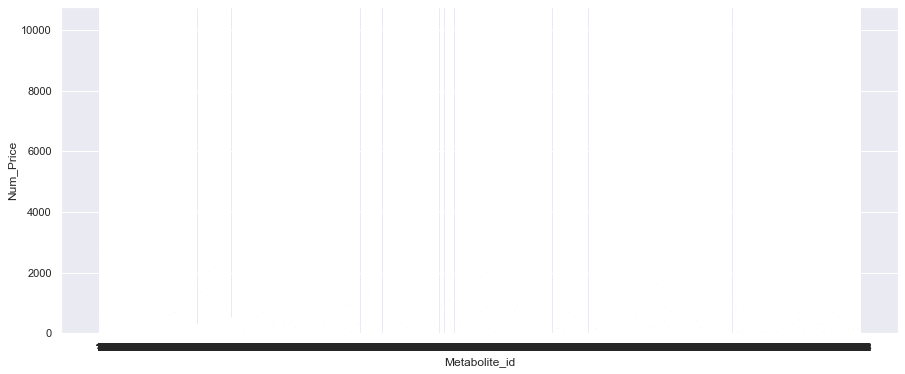

In [122]:
m_id = []
num_price = []
for k,g in df_noNA.groupby('metab_id'):
    m_id.append(k)
    num_price.append(g.shape[0])
    
plt.figure(figsize=(15,6))    
plt.bar(m_id, num_price)
plt.xticks(m_id)
plt.xlabel('Metabolite_id')
plt.ylabel('Num_Price')
plt.show()

In [123]:
#Tentar pôr gráfico acima a dar para ordenar o eixo dos x pelos valores de y

------------

In [28]:
data = go.Bar(x = df.metabolite_id, y = df.num_price_per_g, name = 'Num_Prices_Per_G')
data1 = go.Bar(x = df.metabolite_id, y = df.num_price_per_l, name = 'Num_Prices_Per_L')

layout = go.Layout(barmode='overlay', title = 'Num_Prices_Per_Metabolite')
#layout = go.Layout(barmode='stack', title = 'Num_Prices_Per_Metabolite')  
#este é melhor para ver o numero total de preços de cada metabolito, ele acrescenta ao nº de preços de uma unidade o nº da outra unidade
                                                                    

fig = go.Figure(data  = [data,data1], layout = layout)
po.iplot(fig, show_link= False) # para ver aqui no jupyter
#po.plot(fig)                     # para ver num separador a parte

In [12]:
#Histograma para nº preços por metabolito

fig = go.Figure(
      data=[go.Histogram(x= df.num_price_per_g, name = 'Num Price (g)', opacity = 0.8), go.Histogram(x=df.num_price_per_l, name = 'Num Price (l)', opacity = 0.8)]
      )

fig.update_layout(
    title_text='Num_Metabolites_Per_Num_Prices', # title of plot
    xaxis_title_text='Num_Price', # xaxis label
    yaxis_title_text='Count of Metabolite', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()